DNA methylation data preprocessing and analysis workflow based on the pipeline provided by Ehsan and collegues from Exeter University. 
This version will contain a mix of python native function if they are available and r integrations of functions that don't have a
python native version yet. Of these r integrated function a selection will be translated into python native functions if it is 
necessary for the continuation of the project.

Install the PyMethylProcess package from GitHub - https://github.com/Christensen-Lab-Dartmouth/PyMethylProcess/blob/master/pymethylprocess/MethylationDataTypes.py - because this has similar functionalities, based on the same functions, as those in the Exeter pipeline

In [1]:
pip install git+https://github.com/bodono/scs-python.git@bb45c69ce57b1fbb5ab23e02b30549a7e0b801e3 git+https://github.com/jlevy44/hypopt.git@af59fbed732f5377cda73fdf42f3d4981c2be3ce

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/bodono/scs-python.git (to revision bb45c69ce57b1fbb5ab23e02b30549a7e0b801e3) to c:\users\silke\appdata\local\temp\pip-req-build-x13x6rw9
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/bodono/scs-python.git 'C:\Users\Silke\AppData\Local\Temp\pip-req-build-x13x6rw9'
  Running command git checkout -q bb45c69ce57b1fbb5ab23e02b30549a7e0b801e3
  Running command git submodule update --init --recursive -q


  Cloning https://github.com/jlevy44/hypopt.git (to revision af59fbed732f5377cda73fdf42f3d4981c2be3ce) to c:\users\silke\appdata\local\temp\pip-req-build-rnn44w0l
Using legacy setup.py install for scs, since package 'wheel' is not installed.
Using legacy setup.py install for hypopt, since package 'wheel' is not installed.


  Running command git clone -q https://github.com/jlevy44/hypopt.git 'C:\Users\Silke\AppData\Local\Temp\pip-req-build-rnn44w0l'
You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


Install the methylsuite packages - https://pypi.org/project/methylsuite/ - because this contains functions that can read in raw data files 
rather than beta-matrices

In [2]:
pip install methylsuite

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Using legacy setup.py install for bs4, since package 'wheel' is not installed.
Using legacy setup.py install for toolshed, since package 'wheel' is not installed.
Using legacy setup.py install for interlap, since package 'wheel' is not installed.
    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'
    Running setup.py install for toolshed: started
    Running setup.py install for toolshed: finished with status 'done'
    Running setup.py install for interlap: started
    Running setup.py install for interlap: finished with status 'done'


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


Importing the functionalities needed for the preprocessing and the analysis

In [1]:
from methylprep import make_pipeline, get_sample_sheet

In [2]:
from methylprep.files import create_sample_sheet, find_sample_sheet

In [3]:
import csv
import pandas as pd

Load the original series matrix

In [67]:
original_GSE66351_matrix = pd.read_table("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\GSE66351_RAW\\GSE66351_series_matrix_pheno.txt", header=None)

Rename the columns of the series matrix file so that they match the required column names for the import function from the methyprep package:
Has to include Sentrix_ID and Sentrix_position. The original file does not have these column names (GSE66351)

In [68]:
original_GSE66351_matrix_trans = original_GSE66351_matrix.transpose()
colum_names = ["Sample_Name", "GEO_Accession", "Sample_Status", "Sample_Submission_date", "Sample_last_update_data", "Sample_Type", "Channel_count", "Tissue_Source", "Organism", 
"Cell_Type", "Diagnosis", "Braak_stage", "Braak_region", "Age", "Sex", "Donor_id", "Sentrix_ID", "Sentrix_Position", "Molecule"]
original_GSE66351_matrix_trans.columns = colum_names

Remove the first row
Remove text from data frame cells (i.e Sex: in the cells of column Sex)
Set the index to the barcodes/idat file names

In [69]:
original_GSE66351_matrix_trans.drop([0], inplace=True)
original_GSE66351_matrix_trans.replace("^[^:]*:", "", regex=True, inplace=True)
original_GSE66351_matrix_trans["Sentrix_ID"] = original_GSE66351_matrix_trans["Sentrix_ID"].str.strip()
original_GSE66351_matrix_trans["Sentrix_Position"] = original_GSE66351_matrix_trans["Sentrix_Position"].str.strip()
original_GSE66351_matrix_trans["Sample_ID"] = original_GSE66351_matrix_trans[["Sentrix_ID", "Sentrix_Position"]].agg("_".join, axis = 1)



Save the sample sheet as a .csv file so the methyprep function can deal with it

In [70]:
#original_GSE66351_matrix_trans.to_pickle("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\Data\\GSE66351_python_format\\GSE66351_GPL13534_meta_data.pkl")
original_GSE66351_matrix_trans.to_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\Data\\GSE66351_python_format\\sample_sheet.csv")

Start with loading in the data, using functions from the methylsuite packages since these can deal with .idat files as input. 

In [13]:
sample_sheet_GSE66351_at1 = find_sample_sheet("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\Data\\GSE66351_python_format")

In [71]:
#sample_sheet_GSE66351 = pd.read_pickle("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\GSE66351_python_format\\GSE66351_GPL13534_meta_data.pkl")
sample_sheet_GSE66351 = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\Data\\GSE66351_python_format\\sample_sheet.csv")
sample_sheet_GSE66351.set_index(sample_sheet_GSE66351["Sample_ID"], inplace=True)

Changing .idat filenames

In [5]:
import os, glob, re
import numpy as np

temporarily set the working directory to the file containint the idat files to be imported into the python workflow. This makes the renaming process easier

In [21]:
os.chdir("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\GSE66351_python_format")

Create a list of the idat files in the working directory (python format folder)

In [22]:
idat_files = glob.glob("*.idat")

In [6]:
old_name = idat_files[1]
new_name = re.sub("^[^_]*_", "", old_name)
print(new_name)

8918692108_R03C01_Red.idat


Remove the "GSE[number]" part from the .idat filenames so they match with the expected input format

In [23]:
for file_name in idat_files:
    old_name = file_name
    new_name = re.sub("^[^_]*_", "", old_name)
    final_name = new_name
    os.replace(old_name, final_name)
    print(final_name)


5854945011_R05C02_Red.idat
8918692108_R01C02_Grn.idat
8918692108_R01C02_Red.idat
8918692108_R01C01_Grn.idat
8918692108_R01C01_Red.idat
8918692108_R02C02_Grn.idat
8918692108_R02C02_Red.idat
8918692108_R02C01_Grn.idat
8918692108_R02C01_Red.idat
8918692108_R03C02_Grn.idat
8918692108_R03C02_Red.idat
8918692108_R03C01_Grn.idat
8918692108_R03C01_Red.idat
8918692108_R04C02_Grn.idat
8918692108_R04C02_Red.idat
8918692108_R04C01_Grn.idat
8918692108_R04C01_Red.idat
8918692108_R05C02_Grn.idat
8918692108_R05C02_Red.idat
8918692108_R05C01_Grn.idat
8918692108_R05C01_Red.idat
8918692108_R06C02_Grn.idat
8918692108_R06C02_Red.idat
8918692108_R06C01_Grn.idat
8918692108_R06C01_Red.idat
8918692120_R04C02_Grn.idat
8918692120_R04C02_Red.idat
8918692120_R04C01_Grn.idat
8918692120_R04C01_Red.idat
8918692120_R05C02_Grn.idat
8918692120_R05C02_Red.idat
8918692120_R05C01_Grn.idat
8918692120_R05C01_Red.idat
8918692120_R06C02_Grn.idat
8918692120_R06C02_Red.idat
8918692120_R06C01_Grn.idat
8918692120_R06C01_Red.idat
8

Reading in the data (finally)

In [6]:
steps = ["infer_channel_switch", "poobah", "noob", "dye_bias"]
data = make_pipeline("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\GSE66351_python_format" , sample_sheet_filepath = "E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\GSE66351_python_format\\sample_sheet.csv", steps= None, exports= None, estimator= "beta", batch_size = 50)

INFO:methylprep.processing.pipeline:Running pipeline in: E:\Msc Systems Biology\MSB5000_Master_Thesis\Practical work\Data\GSE66351_python_format
INFO:methylprep.processing.pipeline:Found 17 additional fields in sample_sheet:
Sample_ID | GEO_Accession | Sample_Status | Sample_Submission_date | Sample_last_update_data | Channel_count | Tissue_Source | Organism | Cell_Type | Diagnosis | Braak_stage | Braak_region | Age | Sex | Donor_id | Molecule | Sample_ID.1 --> Sample_ID1
Reading IDATs: 100%|██████████| 50/50 [01:58<00:00,  2.38s/it]
INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450k_15017482_v3.csv
Processing samples: 100%|██████████| 50/50 [21:57<00:00, 26.36s/it]
INFO:methylprep.processing.pipeline:saved beta_values_1.pkl
INFO:methylprep.processing.pipeline:saved noob_meth_values_1.pkl
INFO:methylprep.processing.pipeline:saved noob_unmeth_values_1.pkl
Reading IDATs: 100%|██████████| 50/50 [01:56<00:00,  2.33s/it]
INFO:methylprep.files.manifests:Reading manif

Load the pickel with the beta values back into the environment for further preprocessing

In [6]:
GSE66351_betas = pd.read_pickle(r"E:\Msc Systems Biology\MSB5000_Master_Thesis\Practical work\Data\GSE66351_python_format\beta_values.pkl")

Check to see if the format of the sample IDs created in the sample sheet match those in the betas dataframe

In [19]:
GSE66351_betas.head(2)

,3998919115_R01C01,3998919115_R01C02,3998919115_R02C01,3998919115_R02C02,3998919115_R03C01,3998919115_R03C02,3998919115_R04C01,3998919115_R04C02,3998919115_R05C01,3998919115_R05C02,...,5900438023_R02C01,5900438023_R02C02,5900438023_R03C01,5900438023_R03C02,5900438023_R04C01,5900438023_R04C02,5900438023_R05C01,5900438023_R05C02,5900438023_R06C01,5900438023_R06C02
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.479616,0.627541,0.486108,0.617424,0.550450,0.608114,0.55115,0.550626,0.563407,0.626241,...,0.604292,0.589433,0.634744,0.588834,0.704335,0.606425,0.653571,0.636476,0.635583,0.706858
cg00000108,0.898266,0.889418,0.921810,0.929963,0.923019,0.924952,0.92419,0.916102,0.927355,0.907416,...,0.880465,0.858471,0.910006,0.889632,0.909284,0.902875,0.902258,0.900725,0.900150,0.911341


In [59]:
sample_sheet_GSE66351.head(2)

,Unnamed: 0,Sample_Name,GEO_Accession,Sample_Status,Sample_Submission_date,Sample_last_update_data,Sample_Type,Channel_count,Tissue_Source,Organism,...,Diagnosis,Braak_stage,Braak_region,Age,Sex,Donor_id,Sentrix_ID,Sentrix_Position,Molecule,Sample_ID
Sample_ID,,,,,,,,,,,,,,,,,,,,,
8918692108_ R01C02,1,Dnr01_F_78_AD_Glia,GSM2808875,Public on Aug 12 2018,Oct 12 2017,Aug 12 2018,genomic,1,Occipital Cortex,Homo sapiens,...,AD,6,Occipital cortex,78,F,Dnr01,8918692108,R01C02,genomic DNA,8918692108_ R01C02
8918692108_ R01C01,2,Dnr01_F_78_AD_Neuron,GSM2808876,Public on Aug 12 2018,Oct 12 2017,Aug 12 2018,genomic,1,Occipital Cortex,Homo sapiens,...,AD,6,Occipital cortex,78,F,Dnr01,8918692108,R01C01,genomic DNA,8918692108_ R01C01


Checking the median intensity values of the methylated and unmethylated probes for each sample. Any samples that have probes with a median intensity value <2000 (for blood) or <1500 (for bucal) are discarded because of a too low signal to noise ratio. Additionally any samples that diviate from the median more than 3 * absolute median deviation are considered as strict outliers and require closer inspection to decide if they should be removed before analysis.

In [34]:
GSE66351_methylated = pd.read_pickle(r"E:\Msc Systems Biology\MSB5000_Master_Thesis\Practical work\Data\GSE66351_python_format\noob_meth_values.pkl")
GSE66351_unmethylated = pd.read_pickle(r"E:\Msc Systems Biology\MSB5000_Master_Thesis\Practical work\Data\GSE66351_python_format\noob_unmeth_values.pkl")

met_median = GSE66351_methylated.median(axis=0)
unmet_median = GSE66351_unmethylated.median(axis=0)

lower_bound_met = np.median(met_median) - 3 * (np.median(np.absolute(met_median - np.median(met_median))))
upper_bound_met = np.median(met_median) + 3 * (np.median(np.absolute(met_median - np.median(met_median))))

lower_bound_unmet = np.median(unmet_median) - 3 * (np.median(np.absolute(unmet_median - np.median(unmet_median))))
upper_bound_unmet = np.median(unmet_median) + 3 * (np.median(np.absolute(unmet_median - np.median(unmet_median))))

intensity_threshold = 2000

In [75]:
# create a dataframe to store the Quality Control outcomes in for each sample
QC_frame = sample_sheet_GSE66351
QC_frame.sort_index(axis = 0, inplace=True) # need to sort both the phenotype sheet and the 'to be added' columns so they can be merged into the same dataframe
# alternate fix might be to turn everything into a numpy array (?)
met_median.rename("Median_met_intensities", inplace=True)
unmet_median.rename("Median_unmet_intensities", inplace=True)
intensities = pd.merge(unmet_median, met_median, left_index=True, right_index=True)
intensities.sort_index(axis=0, inplace=True)
intensities.index.name = "Sample_ID"
QC_frame = pd.merge(QC_frame, intensities, left_index=True, right_index=True)




Visualisations of the (un)methylated intensities

In [184]:
import seaborn as sns
from matplotlib import pyplot as plt

Text(0, 0.5, 'Frequency')

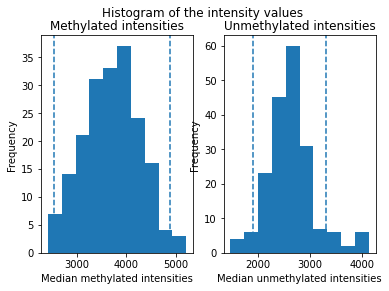

In [47]:
#histogram
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Histogram of the intensity values")
ax1.hist(met_median)
ax1.set_title('Methylated intensities')
ax1.axvline(lower_bound_met, ls = "--")
ax1.axvline(upper_bound_met, ls = "--")
ax1.set_xlabel("Median methylated intensities")
ax1.set_ylabel("Frequency")
ax2.hist(unmet_median)
ax2.set_title("Unmethylated intensities")
ax2.axvline(lower_bound_unmet, ls = "--")
ax2.axvline(upper_bound_unmet, ls = "--")
ax2.set_xlabel("Median unmethylated intensities")
ax2.set_ylabel("Frequency")

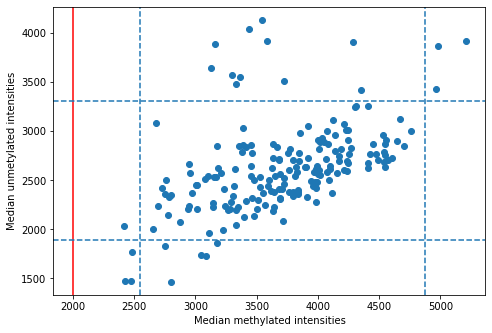

In [48]:
# Scatterplot
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(met_median, unmet_median)
ax.set_xlabel("Median methylated intensities")
ax.set_ylabel("Median unmetylated intensities")
ax.axvline(intensity_threshold, c = "red")
ax.axvline(lower_bound_met, ls = "--")
ax.axvline(upper_bound_met, ls = "--")
ax.axhline(lower_bound_unmet, ls = "--")
ax.axhline(upper_bound_unmet, ls = "--")

In [82]:
#selecting the probes that qualify as strict outliers
strict_intensity_outliers_met = met_median[(met_median >= upper_bound_met) | (met_median <= lower_bound_met)]
strict_intensity_outliers_met.rename("Outliers_met_intensity", inplace=True)
strict_intensity_outliers_unmet = unmet_median[(unmet_median <= lower_bound_unmet) | (unmet_median >= upper_bound_unmet)]
strict_intensity_outliers_unmet.rename("Outliers_unmet_intensity", inplace=True)

strict_outliers = pd.merge(strict_intensity_outliers_unmet, strict_intensity_outliers_met, left_index=True, right_index=True, how='outer')
# Append the strict outlier information onto the QC_frame
QC_frame = QC_frame.merge(strict_outliers, left_index=True, right_index=True, how='outer') #outliers have values, non-outliers are 'NaN'


Gender cluster function test station

In [51]:
from sklearn.decomposition import PCA 
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.cluster import KMeans

betas = GSE66351_betas
npcs = 20
sex = sample_sheet_GSE66351["Sex"]
random_state = 42 #to make sure to PCA output is stabel when the code is run multiple times on the same dataset
thres = 0.2

if npcs > len(betas.columns):
    npcs = len(betas.columns)
    print("As there are only", len(betas.columns), "samples, this is the total number of PCs that can be looked at")
    
    
complete_betas = betas.dropna(axis = 0, how = "any") # drop any rows - probes - that contain missing/NaN values
pca = PCA(n_components = npcs)
pca_results = pca.fit(complete_betas) #also performs zero-centering before fitting the PCA model, same as the r function used in the original code
    
pca_iterator = np.arange(0, npcs)
pca_cor = []
codes_sex, unique = pd.factorize(sex)
for id, x in np.ndenumerate(pca_iterator):
    cor, p_value = pearsonr(pca_results.components_[x,], codes_sex)
    pca_cor.append(float(cor)) # turn into list append
    

pc_output = pd.DataFrame({"PC": pca_iterator, "Correlation": pca_cor})
pc_output.sort_values(by = "Correlation", key = pd.Series.abs, ascending = False, inplace=True) #sort the PCA-gender correlations in descending order
first = abs(pc_output.iloc[0]) #get the two highest correlated PCs
second = abs(pc_output.iloc[1])
print("The top correlated principle components with sex:", first.name + 1, second.name + 1) #the +1 is necessary to get the correct PC number when compared to R since python
# indexes from 0 and R from 1

KMeans_sex = KMeans(n_clusters = 2, random_state = random_state).fit(pca_results.components_[pc_output[abs(pc_output) > thres].dropna().index,].transpose())
predSex_num = KMeans_sex.labels_

The top correlated principle components with sex: 14 5


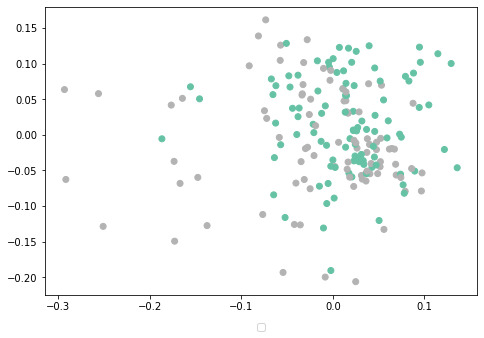

In [222]:
PC_first = pca_results.components_[np.int_(first[0])]
PC_second = pca_results.components_[np.int_(second[0])]
data_to_plot = pd.DataFrame({"Sex" : np.asarray(sex), "PC first" : PC_first, "PC second" : PC_second})
data_to_plot.reset_index()
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
colours = {"F" : "red", "M" : "blue"}
ax.scatter(pca_results.components_[np.int_(first[0])], pca_results.components_[np.int_(second[0])], c = codes_sex, cmap="Set2")
ax.legend(loc = "upper center", bbox_to_anchor = (0.5, -0.08))

In [212]:
np.asarray(sex)

array([' F', ' F', ' M', ' M', ' F', ' F', ' F', ' F', ' M', ' M', ' M',
       ' M', ' F', ' F', ' F', ' F', ' F', ' F', ' F', ' F', ' F', ' F',
       ' F', ' F', ' F', ' F', ' M', ' M', ' M', ' M', ' M', ' M', ' M',
       ' M', ' F', ' F', ' M', ' M', ' F', ' F', ' M', ' M', ' M', ' M',
       ' M', ' M', ' M', ' M', ' F', ' F', ' F', ' F', ' F', ' F', ' F',
       ' F', ' M', ' M', ' M', ' M', ' F', ' F', ' M', ' M', ' F', ' M',
       ' F', ' F', ' M', ' M', ' F', ' F', ' F', ' M', ' M', ' M', ' M',
       ' F', ' F', ' F', ' M', ' M', ' M', ' M', ' M', ' F', ' F', ' M',
       ' F', ' M', ' M', ' F', ' M', ' M', ' M', ' F', ' F', ' M', ' F',
       ' F', ' F', ' F', ' M', ' F', ' F', ' F', ' F', ' F', ' F', ' M',
       ' F', ' F', ' M', ' M', ' F', ' M', ' M', ' M', ' F', ' F', ' M',
       ' F', ' M', ' F', ' F', ' M', ' M', ' M', ' F', ' M', ' F', ' F',
       ' M', ' M', ' F', ' F', ' F', ' M', ' M', ' M', ' M', ' F', ' F',
       ' F', ' M', ' M', ' M', ' M', ' M', ' F', ' 

In [97]:
from sklearn.cluster import KMeans
pca_results_loadings = pd.DataFrame(pca_results.components_)
KMeans_sex = KMeans(n_clusters = 2, random_state = random_state).fit(pca_results_loadings.loc[abs(pc_output["Correlation"]) > 0.2,].transpose())
predSex_num = KMeans_sex.labels_

In [98]:
from sklearn.cluster import KMeans
KMeans_sex = KMeans(n_clusters = 2, random_state = random_state).fit(pca_results.components_[pc_output[abs(pc_output) > 0.2].dropna().index,].transpose())
predSex_num = KMeans_sex.labels_


In [21]:
import methylcheck

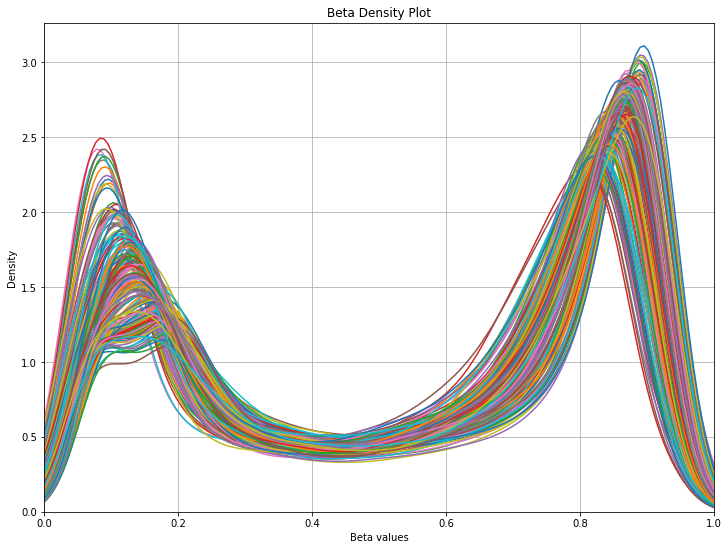

In [22]:
methylcheck.beta_density_plot(GSE66351_betas)

In [ ]:
data = make_pipeline("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\GSE66351_python_format" , sample_sheet_filepath = "E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\GSE66351_python_format\\sample_sheet.csv", steps= None, exports= None, estimator= "beta")